[[0.04936692]]


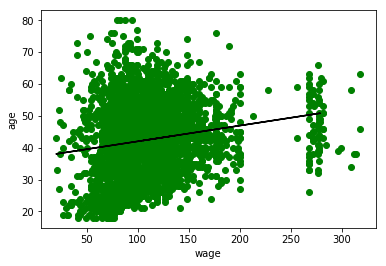

In [65]:
import pandas, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pandas.read_csv('Wage.csv')

X = data['wage'][:,None]
y = data['age'][:,None]

#####
# 1 # - Create a scatter plot comparing wage to age
#####
plt.scatter(X, y, c='green')
plt.xlabel("wage")
plt.ylabel("age")
print('''There does not appear to be a relationship regarding
wages and age. The plots are so scattered that it seems 
''')

#####
# 2 # - Set aside 20% of the data as a test set (20% of 3000 is 600)
#####
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# print(X_train) # age training set, print for debugging
# print(X_test)  # age testing set, ""
# print(y_train) # wage training set, ""
# print(y_test)  # wage testing set, ""


#####
# 3 # - Fit wage as a function of age, list coefficients of model, plot line to scatterplot
#####
reg = LinearRegression().fit(X_train, y_train)
print(reg.coef_)
y_pred = reg.predict(X_test)
plt.plot(X_test, y_pred, color='k')

##### - Predict wages for each items in test set, then score against targets
# 4 # - What does R^2 tell you about how well the model fits the data?
##### 
